### Data

In [1]:
#Imports
import xarray as xr
import sys
sys.path.append('/home/563/rl5183/Functions')
import model_functions as func
import os
import pandas as pd
import numpy as np
import scipy
from scipy import signal
import iris
import iris.analysis.stats as istats
from importlib import reload
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
func=reload(func)

In [3]:
#Historical model runs
hist_temp = func.read_hist_models('/g/data/lp01/CMIP6/CMIP/', '/historical/r1i1p1f1/Amon/ts/gr1.5/')
hist_precip = func.read_hist_models('/g/data/lp01/CMIP6/CMIP/', '/historical/r1i1p1f1/Amon/pr/gr1.5/')

GISS-E2-2-G path does not exist
MIROC-ES2L path does not exist
FIO-ESM-2-0 path does not exist
HadGEM3-GC31-MM path does not exist
HadGEM3-GC31-LL path does not exist
UKESM1-0-LL path does not exist
CNRM-ESM2-1 path does not exist
CNRM-CM6-1 path does not exist
EC-Earth3-LR path does not exist
NorESM1-F path does not exist
IITM-ESM path does not exist
44 model paths found and stored in models dictionary
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/ts/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/ts/gr1.5/v20190630/*.nc
MCM-UA-1-0 /g/data/lp01/CMIP6/CMIP/UA/MCM-UA-1-0/historical/r1i1p1f1/Amon/ts/gr1.5/v20190731/*.nc
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/ts/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/ts/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historic

In [4]:
#Future model runs
future_temp = func.read_future_models('/g/data/lp01/CMIP6/ScenarioMIP/', '/ssp585/r1i1p1f1/Amon/ts/gr1.5/')
future_precip = func.read_future_models('/g/data/lp01/CMIP6/ScenarioMIP/', '/ssp585/r1i1p1f1/Amon/pr/gr1.5/')

MPI-ESM-1-2-HAM path does not exist
MCM-UA-1-0 path does not exist
MIROC-ES2L path does not exist
FIO-ESM-2-0 path does not exist
UKESM1-0-LL path does not exist
CNRM-ESM2-1 path does not exist
CNRM-CM6-1 path does not exist
27 model paths found and stored in models dictionary
NESM3 /g/data/lp01/CMIP6/ScenarioMIP/NUIST/NESM3/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190728/*.nc
ACCESS-CM2 /g/data/lp01/CMIP6/ScenarioMIP/CSIRO-ARCCSS/ACCESS-CM2/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190924/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-LR/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190119/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/ScenarioMIP/CAS/FGOALS-f3-L/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20191013/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp585/r1i1p1f1/Amon/ts/gr1.5/v20190818/*.nc
BCC-CSM2-MR /g/data/lp01/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp585/r1i1p1f1/Amon/ts/gr1.5/v201903

In [5]:
#Find common models between all four datasets
hist_temp = hist_temp.where(hist_temp.model.isin(hist_precip.model), drop = True)
hist_temp = hist_temp.where(hist_temp.model.isin(future_temp.model), drop = True)
hist_temp = hist_temp.where(hist_temp.model.isin(future_precip.model), drop = True)
hist_precip = hist_precip.where(hist_precip.model.isin(hist_temp.model), drop = True)
future_temp = future_temp.where(future_temp.model.isin(hist_temp.model), drop = True)
future_precip = future_precip.where(future_precip.model.isin(hist_temp.model), drop = True)

In [6]:
#Detrend future temp data
future_ts_data = future_temp.ts

future_ts_dt = np.apply_along_axis(scipy.signal.detrend, 1, future_ts_data)

future_ts = xr.DataArray(future_ts_dt, coords=future_ts_data.coords, attrs=future_ts_data.attrs)

In [7]:
#Detrend historical temp data
hist_ts_data = hist_temp.ts

hist_ts_dt = np.apply_along_axis(scipy.signal.detrend, 1, hist_ts_data)

hist_ts = xr.DataArray(hist_ts_dt, coords=hist_ts_data.coords, attrs=hist_ts_data.attrs)

In [8]:
#discard models rejected by model evaluation
future_ts = future_ts.drop_sel(model=['INM-CM4-8', 'INM-CM5-0'])
hist_ts = hist_ts.drop_sel(model=['INM-CM4-8', 'INM-CM5-0'])

### Basic ENSO characteristics

[Text(0, 0.5, 'Standard Deviation'), Text(0.5, 0, 'Longitude (degrees east)')]

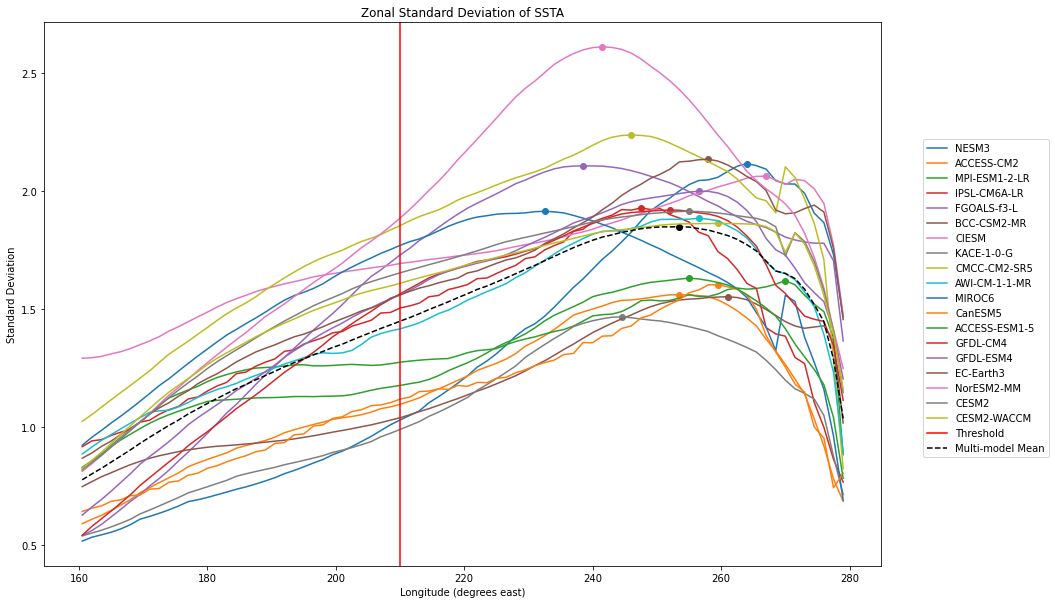

In [9]:
#Zonal Std Dev of SSTA

lon = np.arange(160.5, 279.5, 1.5)

zon_std_list = []
for m in future_ts.model:
    zon_std_list.append(func.zonal_std(future_ts.sel(model=m)))
    
zon_std = xr.DataArray(zon_std_list, dims=['model', 'lon'])
zon_std.coords['model'] = future_ts.model.values
zon_std.coords['lon'] = lon

fig, ax = plt.subplots(figsize=(15,10))

for m in zon_std.model:
    zon_std.sel(model=m).plot(ax=ax, label=f'{m.data}')
    ymax = np.max(zon_std.sel(model=m))
    xmax = lon[np.where(zon_std.sel(model=m) == ymax)]
    plt.scatter(xmax, ymax)

#150W = 210E
plt.axvline(210, 0, 1, color='red', label='Threshold')

#multi-model mean
zon_std_mmm = zon_std.mean(dim='model')
zon_std_mmm.plot(ax=ax, linestyle='--', color='black', label='Multi-model Mean')
ymax = np.max(zon_std_mmm)
xmax = lon[np.where(zon_std_mmm == ymax)]
plt.scatter(xmax, ymax, color='black')

lgd = plt.legend(loc=(1.05, 0.2))
ax.set_title('Zonal Standard Deviation of SSTA')
ax.set(xlabel = 'Longitude (degrees east)', ylabel = 'Standard Deviation')

#plt.savefig('zonal_std_ssta.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)

In [10]:
#Nino3.4 anomalies 
nino34_list = []

for m in future_ts.model:
    nino34_list.append(func.nino34_future(future_ts.sel(model=m)))
    
nino34 = xr.concat(nino34_list, dim='model')

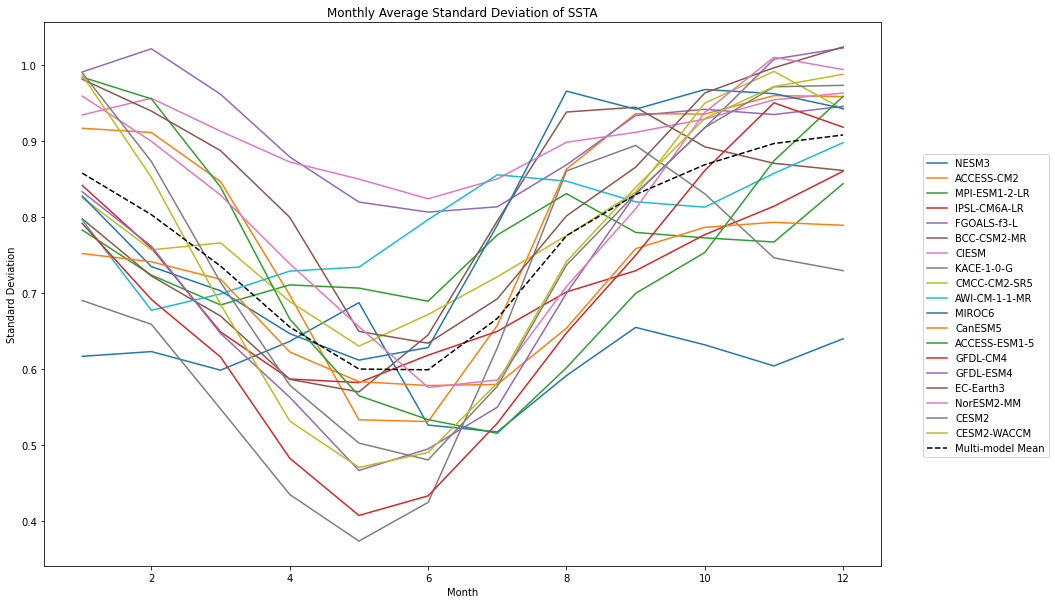

In [11]:
#Monthly average Nino3.4 SSTA Std
monthly_std = nino34.groupby('time.month').std(['time'])

fig, ax = plt.subplots(figsize = (15,10))

for m in monthly_std.model:
    monthly_std.sel(model=m).plot(ax=ax, label=f'{m.data}')
    
monthly_std_mmm = monthly_std.mean(dim='model')
monthly_std_mmm.plot(ax=ax, linestyle='--', color='black', label='Multi-model Mean')

ax.set_title('Monthly Average Standard Deviation of SSTA')
ax.set(xlabel = 'Month', ylabel = 'Standard Deviation')

lgd = plt.legend(loc=(1.05, 0.2))

#plt.savefig('monthly_std_ssta.jpg', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300, quality=80, optimize=True, progressive=True)

In [12]:
seasonal_std = nino34.groupby('time.season').std(['time'])
seasonal_std

<xarray.DataArray (model: 19, season: 4)>
array([[0.63175286, 0.67506277, 0.76044761, 0.66978768],
       [0.92969284, 0.738017  , 0.72183855, 0.95337642],
       [0.78822746, 0.93498498, 0.76412717, 0.79781866],
       [0.84488153, 0.74799708, 0.63833187, 0.77481214],
       [0.98719662, 0.8456563 , 0.89370062, 0.94277699],
       [0.82076568, 0.84248669, 0.6876575 , 0.92096418],
       [0.95243611, 0.9035728 , 0.89628477, 0.93557498],
       [0.70353609, 0.81450866, 0.47367371, 0.85421907],
       [0.8657767 , 0.80013005, 0.73391103, 0.9287819 ],
       [0.797382  , 0.90424023, 0.74923594, 0.84102124],
       [0.85679864, 0.87414495, 0.67862628, 0.95756623],
       [0.78680867, 0.7091211 , 0.68870032, 0.78054019],
       [0.9709085 , 0.58390921, 0.76099563, 0.79282003],
       [0.8188868 , 0.75482651, 0.56815385, 0.87225717],
       [0.8841674 , 0.71527516, 0.63930085, 0.93034588],
       [0.98233816, 0.76829319, 0.81990167, 0.95283808],
       [0.95763285, 0.67100845, 0.76836902, 0.92736604],
       [0.96311512, 0.72757593, 0.63159114, 0.91388562],
       [0.95598264, 0.71926209, 0.60841867, 0.92015152]])
Coordinates:
  * model    (model) object 'NESM3' 'ACCESS-CM2' ... 'CESM2' 'CESM2-WACCM'
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

### ENSO Changes

In [13]:
func=reload(func)

In [14]:
#landmask
landmask_ds = xr.open_dataset('/g/data/eg3/pfd548/gridarea/land-sea_mask/fractional_land.1.5-deg.nc')
landmask = landmask_ds.mean(dim='time')

In [15]:
#30 year climatology for comparison 
future_clim = future_ts.sel(time=slice('2070-01', '2099-12'))
hist_clim = hist_ts.sel(time=slice('1970-01', '1999-12'))

In [16]:
#Future Nino3.4 anomalies 
nino34_list = []

for m in future_clim.model:
    nino34_list.append(func.nino34_clim(future_clim.sel(model=m)))
    
nino34 = xr.concat(nino34_list, dim='model')

In [17]:
#Historical Nino3.4 anomalies 
nino34_list_hist = []

for m in hist_clim.model:
    nino34_list_hist.append(func.nino34_clim(hist_clim.sel(model=m)))
    
nino34_hist = xr.concat(nino34_list_hist, dim='model')

In [18]:
#Future SSTA composites for each model EL NINO

nino_comp_list = []

for m in future_clim.model:
    nino_comp_list.append(func.nino_sst_comp(future_clim.sel(model=m), nino34.sel(model=m)))

nino_sst_comp = xr.concat(nino_comp_list, dim='model')

nino_sst_comp_landmask = nino_sst_comp.where(landmask.data==0)

In [19]:
#Historical SSTA composites for each model EL NINO

nino_comp_list_hist = []

for m in hist_clim.model:
    nino_comp_list_hist.append(func.nino_sst_comp(hist_clim.sel(model=m), nino34_hist.sel(model=m)))

nino_sst_comp_hist = xr.concat(nino_comp_list_hist, dim='model')

nino_sst_comp_hist_landmask = nino_sst_comp_hist.where(landmask.data==0)

In [20]:
#Future SSTA composites for each model LA NINA

nina_comp_list = []

for m in future_clim.model:
    nina_comp_list.append(func.nina_sst_comp(future_clim.sel(model=m), nino34.sel(model=m)))

nina_sst_comp = xr.concat(nina_comp_list, dim='model')

nina_sst_comp_landmask = nina_sst_comp.where(landmask.data==0)

In [21]:
#Historical SSTA composites for each model LA NINA

nina_comp_list_hist = []

for m in hist_clim.model:
    nina_comp_list_hist.append(func.nina_sst_comp(hist_clim.sel(model=m), nino34_hist.sel(model=m)))

nina_sst_comp_hist = xr.concat(nina_comp_list_hist, dim='model')

nina_sst_comp_hist_landmask = nina_sst_comp_hist.where(landmask.data==0)

In [22]:
#Multi-model mean
future_nino_mmm_sst = nino_sst_comp_landmask.mean(dim='model')
hist_nino_mmm_sst = nino_sst_comp_hist_landmask.mean(dim='model')
future_nina_mmm_sst = nina_sst_comp_landmask.mean(dim='model')
hist_nina_mmm_sst = nina_sst_comp_hist_landmask.mean(dim='model')
#Difference
nino_diff_sst = future_nino_mmm_sst - hist_nino_mmm_sst
nina_diff_sst = future_nina_mmm_sst - hist_nina_mmm_sst

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Precip

In [48]:
hist_pr = hist_precip.pr.sel(time=slice('1970-01','1999-12'))
hist_pr = hist_pr*86400
future_pr = future_precip.pr.sel(time=slice('2070-01','2099-12'))
future_pr = future_pr*86400

In [49]:
#Future precip composites for each model EL NINO

nino_comp_list = []

for m in future_clim.model:
    nino_comp_list.append(func.nino_pr_comp(future_clim.sel(model=m), nino34.sel(model=m), 'DJF'))

nino_pr_comp = xr.concat(nino_comp_list, dim='model')

nino_pr_comp_landmask = nino_pr_comp.where(landmask.data==1)

In [50]:
#Historical precip composites for each model EL NINO

nino_comp_list_hist = []

for m in hist_clim.model:
    nino_comp_list_hist.append(func.nino_pr_comp(hist_clim.sel(model=m), nino34_hist.sel(model=m), 'DJF'))

nino_pr_comp_hist = xr.concat(nino_comp_list_hist, dim='model')

nino_pr_comp_hist_landmask = nino_pr_comp_hist.where(landmask.data==1)

In [51]:
#Future precip composites for each model LA NINA

nina_comp_list = []

for m in future_clim.model:
    nina_comp_list.append(func.nina_pr_comp(future_clim.sel(model=m), nino34.sel(model=m), 'DJF'))

nina_pr_comp = xr.concat(nina_comp_list, dim='model')

nina_pr_comp_landmask = nina_pr_comp.where(landmask.data==1)

In [52]:
#Historical precip composites for each model LA NINA

nina_comp_list_hist = []

for m in hist_clim.model:
    nina_comp_list_hist.append(func.nina_pr_comp(hist_clim.sel(model=m), nino34_hist.sel(model=m), 'DJF'))

nina_pr_comp_hist = xr.concat(nina_comp_list_hist, dim='model')

nina_pr_comp_hist_landmask = nina_pr_comp_hist.where(landmask.data==1)

In [53]:
#Multi-model mean
future_nino_mmm_pr = nino_pr_comp_landmask.mean(dim='model')
hist_nino_mmm_pr = nino_pr_comp_hist_landmask.mean(dim='model')
future_nina_mmm_pr = nina_pr_comp_landmask.mean(dim='model')
hist_nina_mmm_pr = nina_pr_comp_hist_landmask.mean(dim='model')
#Difference
nino_diff_pr_djf = future_nino_mmm_pr - hist_nino_mmm_pr
nina_diff_pr_djf = future_nina_mmm_pr - hist_nina_mmm_pr

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Plots

Text(0.5, 1.0, 'd) Change in Precip La Nina')

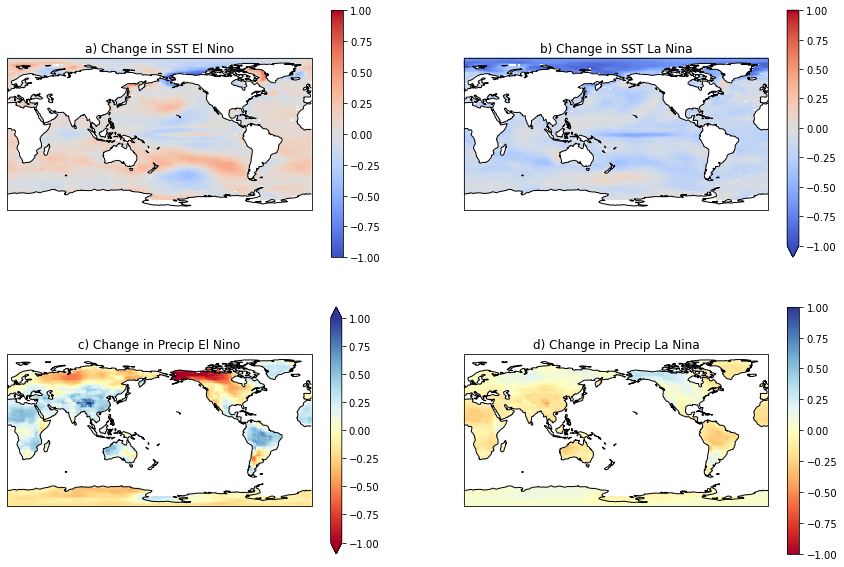

In [54]:
fig = plt.figure(figsize=(15,10))


ax = fig.add_subplot(221, projection=ccrs.PlateCarree(180))
C = nino_diff_sst.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
ax.set_title('a) Change in SST El Nino')

ax = fig.add_subplot(222, projection=ccrs.PlateCarree(180))
C = nina_diff_sst.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
ax.set_title('b) Change in SST La Nina')

ax = fig.add_subplot(223, projection=ccrs.PlateCarree(180))
C = nino_diff_pr_djf.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='RdYlBu')
ax.coastlines()
ax.set_title('c) Change in Precip El Nino')

ax = fig.add_subplot(224, projection=ccrs.PlateCarree(180))
C = nina_diff_pr_djf.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='RdYlBu')
ax.coastlines()
ax.set_title('d) Change in Precip La Nina')

Text(0.5, 1.0, 'Change in Precip El Nino DJF')

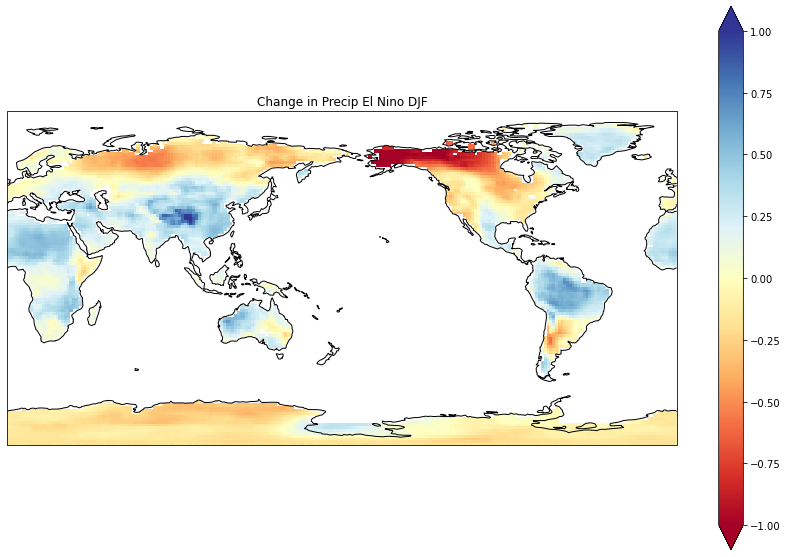

In [55]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(180))
C = nino_diff_pr_djf.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='RdYlBu')
ax.coastlines()
ax.set_title('Change in Precip El Nino DJF')

Text(0.5, 1.0, 'Change in Precip La Nina DJF')

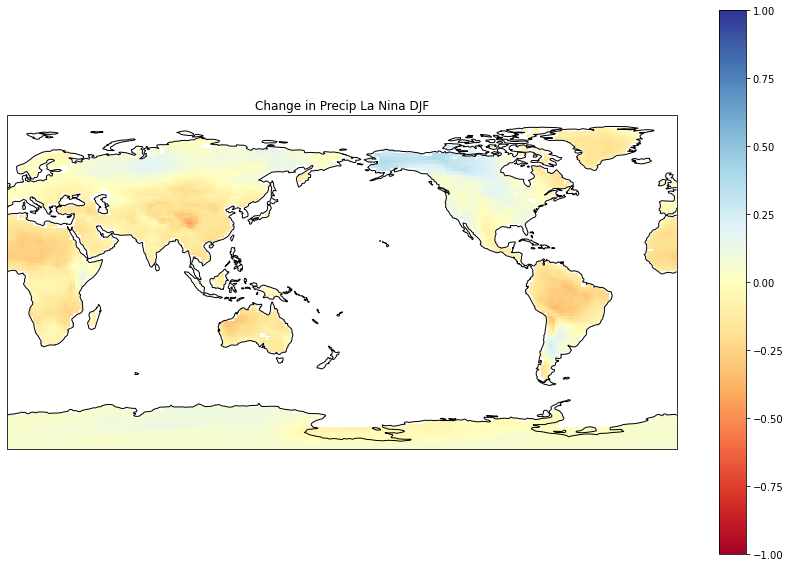

In [56]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(180))
C = nina_diff_pr_djf.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='RdYlBu')
ax.coastlines()
ax.set_title('Change in Precip La Nina DJF')

### SON

In [57]:
#Future precip composites for each model EL NINO

nino_comp_list = []

for m in future_clim.model:
    nino_comp_list.append(func.nino_pr_comp(future_clim.sel(model=m), nino34.sel(model=m), 'SON'))

nino_pr_comp = xr.concat(nino_comp_list, dim='model')

nino_pr_comp_landmask = nino_pr_comp.where(landmask.data==1)

In [58]:
#Historical precip composites for each model EL NINO

nino_comp_list_hist = []

for m in hist_clim.model:
    nino_comp_list_hist.append(func.nino_pr_comp(hist_clim.sel(model=m), nino34_hist.sel(model=m), 'SON'))

nino_pr_comp_hist = xr.concat(nino_comp_list_hist, dim='model')

nino_pr_comp_hist_landmask = nino_pr_comp_hist.where(landmask.data==1)

In [59]:
#Future precip composites for each model LA NINA

nina_comp_list = []

for m in future_clim.model:
    nina_comp_list.append(func.nina_pr_comp(future_clim.sel(model=m), nino34.sel(model=m), 'SON'))

nina_pr_comp = xr.concat(nina_comp_list, dim='model')

nina_pr_comp_landmask = nina_pr_comp.where(landmask.data==1)

In [60]:
#Historical precip composites for each model LA NINA

nina_comp_list_hist = []

for m in hist_clim.model:
    nina_comp_list_hist.append(func.nina_pr_comp(hist_clim.sel(model=m), nino34_hist.sel(model=m), 'SON'))

nina_pr_comp_hist = xr.concat(nina_comp_list_hist, dim='model')

nina_pr_comp_hist_landmask = nina_pr_comp_hist.where(landmask.data==1)

In [61]:
#Multi-model mean
future_nino_mmm_pr = nino_pr_comp_landmask.mean(dim='model')
hist_nino_mmm_pr = nino_pr_comp_hist_landmask.mean(dim='model')
future_nina_mmm_pr = nina_pr_comp_landmask.mean(dim='model')
hist_nina_mmm_pr = nina_pr_comp_hist_landmask.mean(dim='model')
#Difference
nino_diff_pr_son = future_nino_mmm_pr - hist_nino_mmm_pr
nina_diff_pr_son = future_nina_mmm_pr - hist_nina_mmm_pr

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.04/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'Change in Precip El Nino SON')

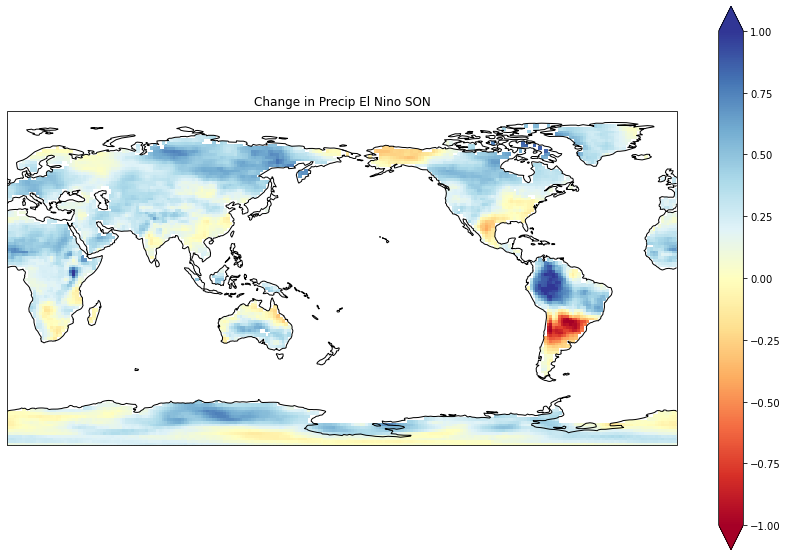

In [62]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(180))
C = nino_diff_pr_son.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='RdYlBu')
ax.coastlines()
ax.set_title('Change in Precip El Nino SON')

Text(0.5, 1.0, 'Change in Precip La Nina SON')

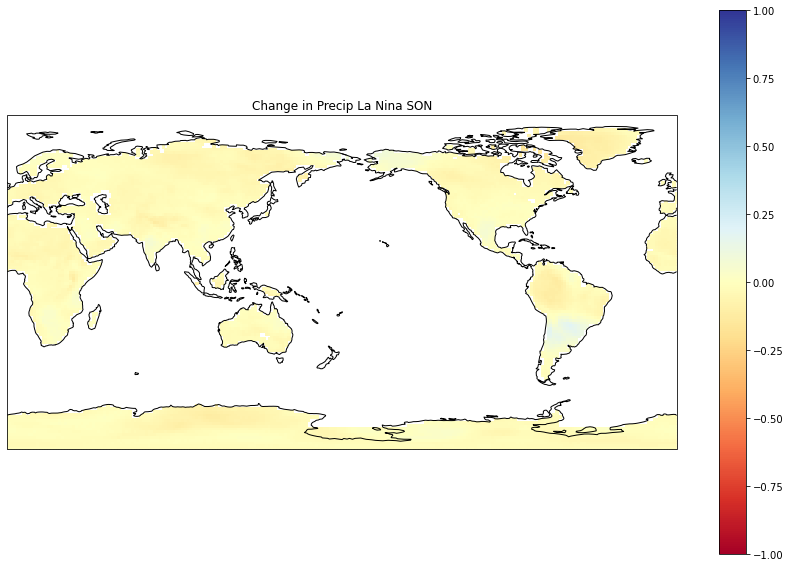

In [63]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(180))
C = nina_diff_pr_son.plot(ax=ax, vmin=-1, vmax=1, transform=ccrs.PlateCarree(), cmap='RdYlBu')
ax.coastlines()
ax.set_title('Change in Precip La Nina SON')